<a href="https://colab.research.google.com/github/NewCodeLearner/DeepLearning_PyTorch/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating simple neural network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#create a model class that inherits the nn.module class

class Model (nn.Module):
    #input layer ( 4 features of the flower)
    #hidden layer 1 (8 neurons)
    #hidden layer 2 (8 neurons)
    #output ( 3 classes of iris flower)

    # we define the neural network inside the __init__ function
    # and then we define forward method to link the layers output

    def __init__(self,input_features=4,hidden_layer1=8,
                 hidden_layer2=8,out_features=3):
        super().__init__() #instantiate nn.module
        self.fc1 = nn.Linear(input_features,hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1,hidden_layer2)
        self.out = nn.Linear(hidden_layer2,out_features)

    #feed forward
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x


In [ ]:
#pick a manual seed for randomization
torch.manual_seed(42)

#create  instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#find the dataset in github, click on raw and then use that link in url
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
my_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#change last column to integer instead of text
my_df['species']=my_df['species'].map({'setosa':0.0,'versicolor':1.0,'virginica':2.0})

In [ ]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Train Test Split Set X, y
X = my_df.drop('species',axis=1)
y = my_df['species']

#convert these to numpy arrays
X=X.values
y=y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Convert X features to float tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the actual value
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer , lr = learning rate
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>


In [ ]:
# Train our model
# Epoch (one run thru all the training data in our network)
epochs =100
losses =[]
for i in range(epochs):
    #go forward and get prediction
    y_pred = model.forward(X_train)

    #Measure the loss/error
    loss = criterion(y_pred,y_train) #predicted values vs y_train

    #keep track of losses
    losses.append(loss.detach().numpy())

    #print every 10 epochs
    if i % 10 ==0 :
      print(f'Epoch : {i} and loss: {loss}')

    #Do Some back propogation: take the error rate of forward propogation
    #and feed it back thru the network to fine tune the weights
    optimizer.zero_grad() #during the training phase, we typically want to explicitly set the gradients to zero before starting to do backpropagation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients on subsequent backward passes.
    loss.backward() #back propogation
    optimizer.step() #update the weights

Epoch : 0 and loss: 1.1973121166229248
Epoch : 10 and loss: 1.0163519382476807
Epoch : 20 and loss: 0.895247757434845
Epoch : 30 and loss: 0.7789366841316223
Epoch : 40 and loss: 0.6230968236923218
Epoch : 50 and loss: 0.3830468952655792
Epoch : 60 and loss: 0.21116439998149872
Epoch : 70 and loss: 0.1203203946352005
Epoch : 80 and loss: 0.08342476189136505
Epoch : 90 and loss: 0.07000991702079773


Text(0.5, 0, 'Epoch')

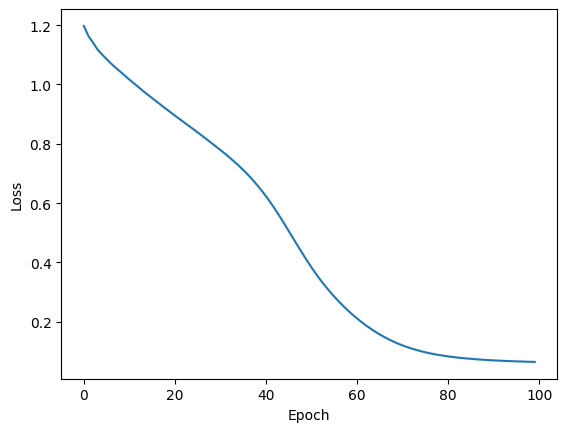

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [ ]:
#Evaluate Model on Test Data set

with torch.no_grad(): #turn off back propagation
  y_eval=model.forward(X_test) # X_test are featured from our test set
  loss =criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.0725)

In [ ]:
correct =0
with torch.no_grad():
  for i ,data in enumerate(X_test):
    y_val = model.forward(data)
    #will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(f'we got {correct} correct!')

1.) tensor([-2.7766,  6.5098,  3.0125]) 	 1
2.) tensor([ 9.9323,  3.5155, -3.6764]) 	 0
3.) tensor([-16.5169,   4.1393,  17.4633]) 	 2
4.) tensor([-2.8851,  6.3831,  3.1668]) 	 1
5.) tensor([-3.0257,  7.0476,  3.2972]) 	 1
6.) tensor([ 9.1983,  3.3501, -3.4119]) 	 0
7.) tensor([0.6662, 6.0145, 0.4334]) 	 1
8.) tensor([-7.1357,  6.0514,  7.7061]) 	 2
9.) tensor([-5.1059,  5.6942,  5.4496]) 	 1
10.) tensor([-0.2340,  6.3753,  0.8525]) 	 1
11.) tensor([-6.1102,  6.0459,  6.6046]) 	 2
12.) tensor([ 8.7991,  2.8555, -3.3361]) 	 0
13.) tensor([ 9.9521,  3.2539, -3.7283]) 	 0
14.) tensor([ 8.8911,  2.9490, -3.3570]) 	 0
15.) tensor([ 9.6154,  3.1376, -3.6137]) 	 0
16.) tensor([-2.3751,  6.9398,  2.6662]) 	 1
17.) tensor([-11.1323,   4.6285,  11.8553]) 	 2
18.) tensor([-0.5906,  6.2539,  0.9741]) 	 1
19.) tensor([-2.8579,  6.1088,  3.1091]) 	 1
20.) tensor([-11.0335,   4.4787,  11.7429]) 	 2
21.) tensor([ 8.5078,  2.9601, -3.2026]) 	 0
22.) tensor([-5.6219,  5.7579,  6.0614]) 	 2
23.) tensor([

In [34]:
#lets predict on new data

new_iris = torch.tensor([4.1,3.5,1.4,0.2])
with torch.no_grad():
  print(model(new_iris))
  print(model(new_iris).argmax())

# 0 -Sentosa 1-versicolor,2-virginica

tensor([ 8.3638,  2.7051, -3.1881])
tensor(0)


In [35]:
#save our NN model
torch.save(model.state_dict(),'my_first_nn_model.pt')

In [36]:
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_nn_model.pt'))

<ipython-input-36-127593ccdbc5>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_first_nn_model.pt'))


<All keys matched successfully>

In [37]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)